#### DELIVERABLE 1

## Univariate analysis (12 marks)
* a. Univariate analysis –data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
* b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
* c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

## Multivariate analysis(8 marks)
* a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
* b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
data.isnull().sum() #checking for number of missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [86]:

print(data.age.value_counts(),'\n')

print(data.job.value_counts(),'\n')

print(data.marital.value_counts(),'\n')

print(data.education.value_counts(),'\n')

print(data.default.value_counts(),'\n')

print(data.balance.value_counts(),'\n')

print(data.housing.value_counts(),'\n')

print(data.loan.value_counts(),'\n')

print(data.contact.value_counts(),'\n')

print(data.day.value_counts(),'\n')

print(data.month.value_counts(),'\n')

print(data.duration.value_counts(),'\n')

print(data.campaign.value_counts(),'\n')

print(data.pdays.value_counts(),'\n')

print(data.previous.value_counts(),'\n')

print(data.poutcome.value_counts(),'\n')

print(data.Target.value_counts(),'\n')


32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

no     44396
yes      815
Name: default, dtype: int64 

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64 

yes    25130
no     20081
Name: housing, dtype: int64 

no     37967
yes     7244
Name: loan, dtype: int6

According to the result, there's no null value existing across all the 17 categories.
Values seem to be reasonable type of data.

In [77]:
data.corr() #show correlation matrix 

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


==> with 1 being the maximum correlation value, we don't see a lot of correlations between the different values across those categories (check for correlation >0.8) => There are no linear relationships between any two variables.
There is no strong correlation between any two variables.
There is no strong correlation between any independent variable and class variable.


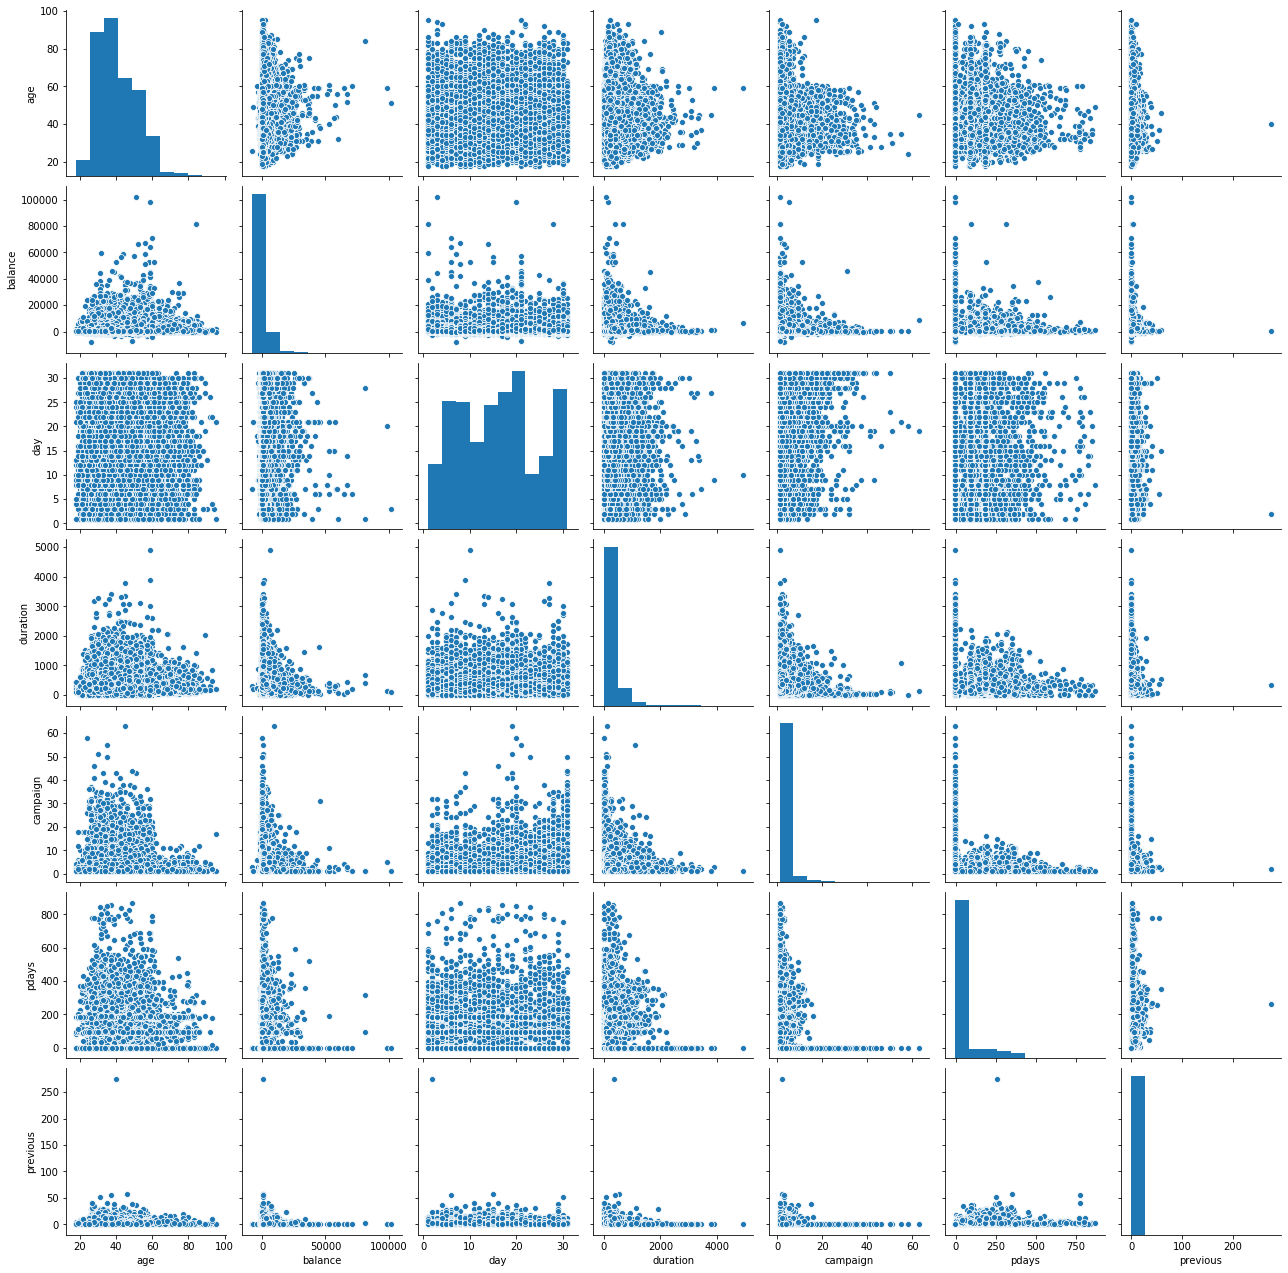

In [122]:
sns.pairplot(data)

In [79]:
data.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

==> If skewness value is zero, then it is not skewed - more even distributions

==> If it is less than zero, then negatively skewed (left tail) and if greater than zero then positively skewed (right tail)

Insights about data:

* Not skewed (close to zero values): day
* Positively skewed data: age, balance, duration, campaign, 
* N/A: pdays, and previous


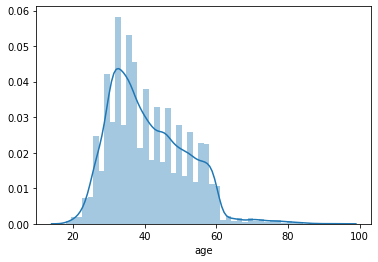

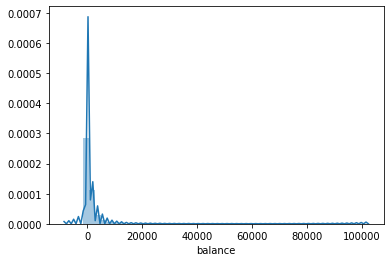

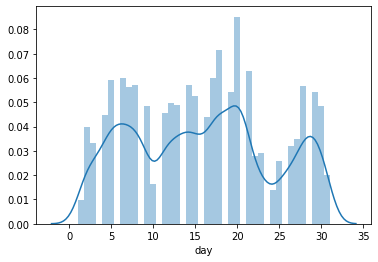

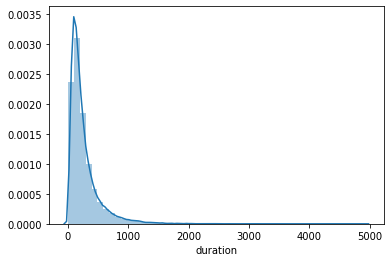

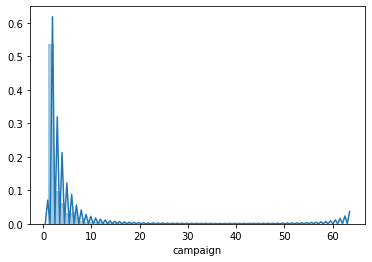

In [85]:
sns.distplot(data['age'])
plt.show()

sns.distplot(data['balance'])
plt.show()

sns.distplot(data['day'])
plt.show()

sns.distplot(data['duration'])
plt.show()

sns.distplot(data['campaign'])
plt.show()


In [103]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [101]:
## replace categorical values into new numbers

replace_data = {
                "marital":     {"married": 2, "single": 1 ,"divorced": 0 },
                "education": {"primary": 1, "secondary":2 , "tertiary": 3, "unknown": 4},
                 "default": {"yes": 1, "no":0},
               "housing": {"yes": 1, "no":0},  "loan": {"yes": 1, "no":0}, "contact": {"cellular": 1, "telephone":2, "unknown":3},
                 "month": {"jan": 1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12},   
"poutcome":{"success":1, "failure":0,"unknown":2,"other":3}, "Target":{"yes":1,"no":0}}


In [106]:
newdata=data.replace(replace_data)

newdata.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,2,3,0,2143,1,0,3,5,5,261,1,-1,0,2,0
1,44,technician,1,2,0,29,1,0,3,5,5,151,1,-1,0,2,0
2,33,entrepreneur,2,2,0,2,1,1,3,5,5,76,1,-1,0,2,0
3,47,blue-collar,2,4,0,1506,1,0,3,5,5,92,1,-1,0,2,0
4,33,unknown,1,4,0,1,0,0,3,5,5,198,1,-1,0,2,0
5,35,management,2,3,0,231,1,0,3,5,5,139,1,-1,0,2,0
6,28,management,1,3,0,447,1,1,3,5,5,217,1,-1,0,2,0
7,42,entrepreneur,0,3,1,2,1,0,3,5,5,380,1,-1,0,2,0
8,58,retired,2,1,0,121,1,0,3,5,5,50,1,-1,0,2,0
9,43,technician,1,2,0,593,1,0,3,5,5,55,1,-1,0,2,0


In [107]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int64   
 3   education  45211 non-null  int64   
 4   default    45211 non-null  int64   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int64   
 7   loan       45211 non-null  int64   
 8   contact    45211 non-null  int64   
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int64   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int64   
 16  Target     45211 non-null  int64   
dtypes: category(1), int64(16)
memory usage: 5.6 MB


In [110]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(newdata, size=11):
    corr = newdata.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

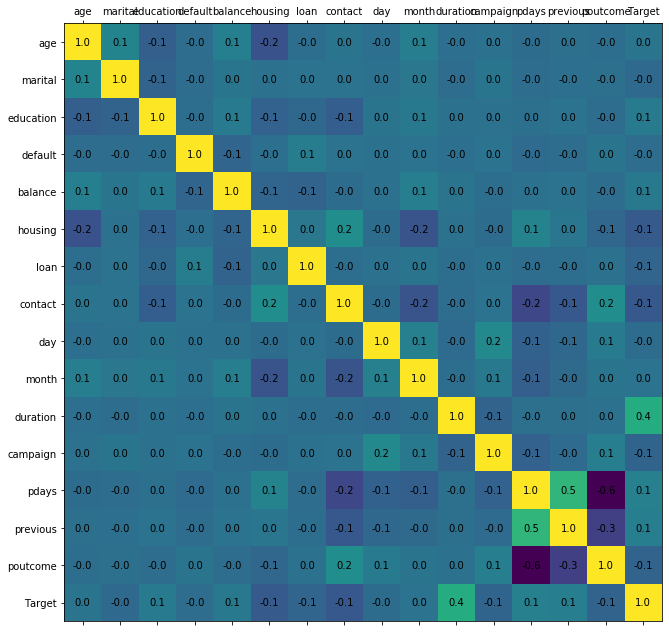

In [113]:
plot_corr(newdata)

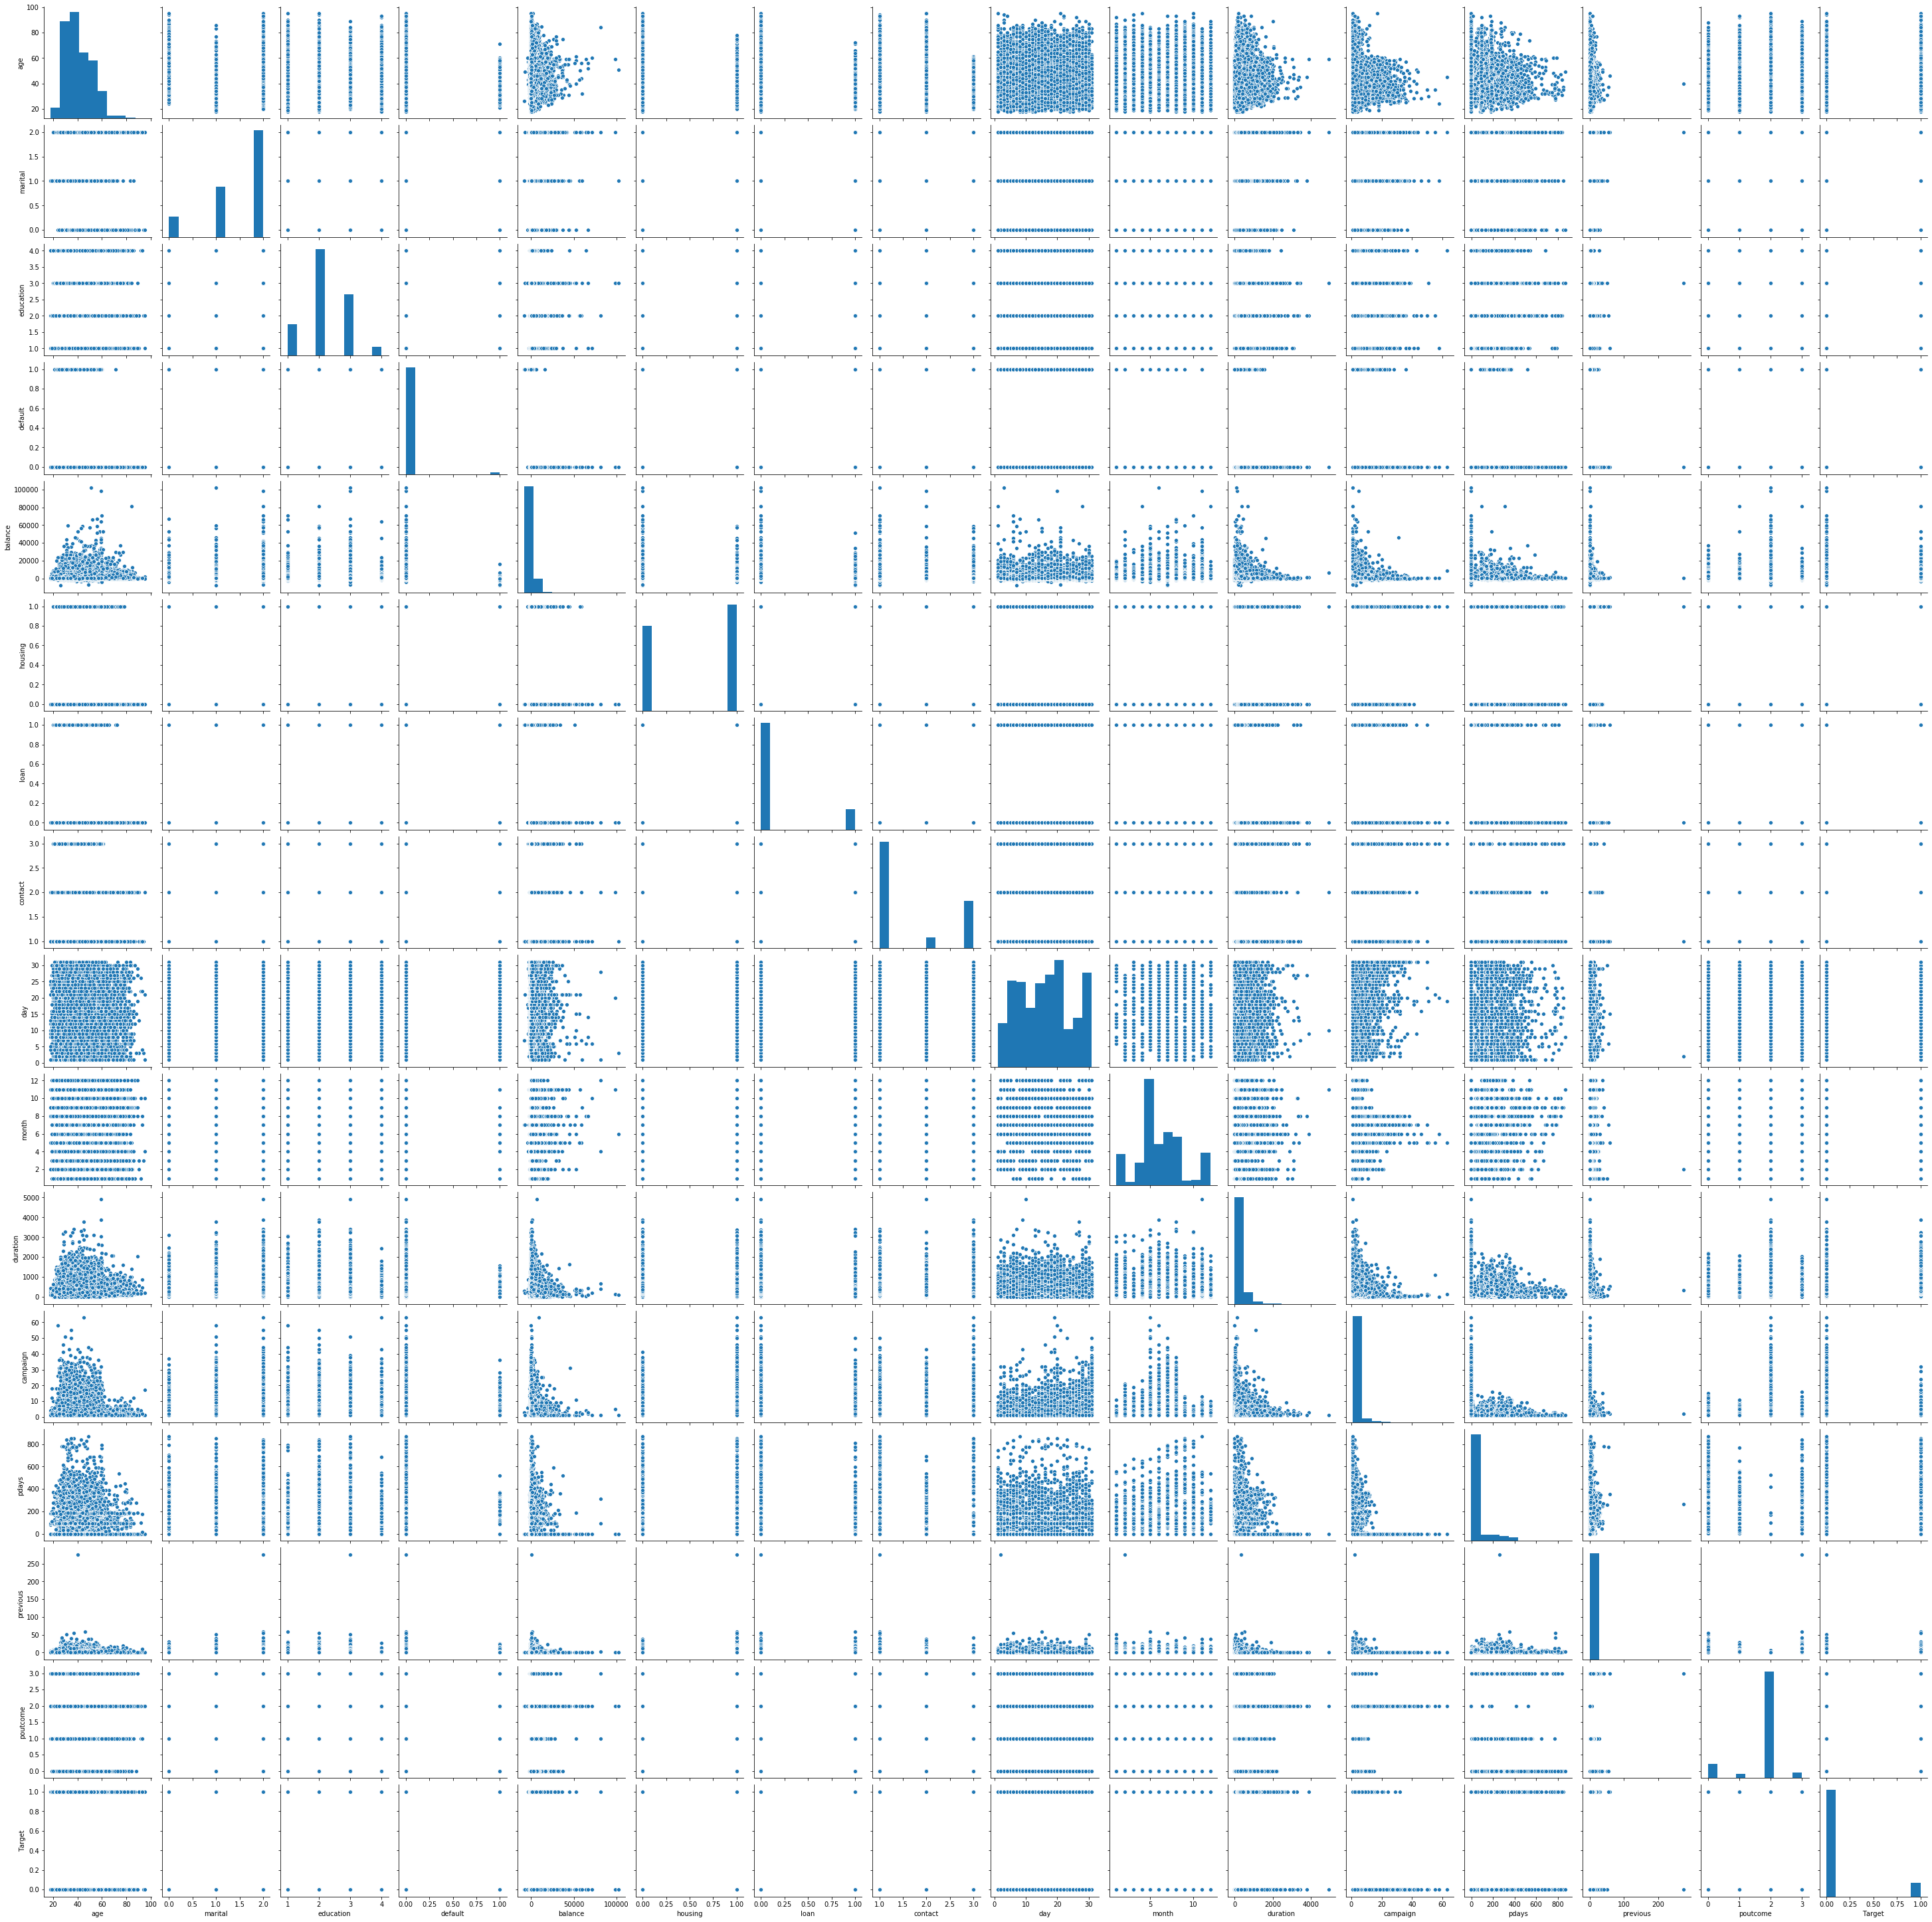

In [123]:
sns.pairplot(newdata)

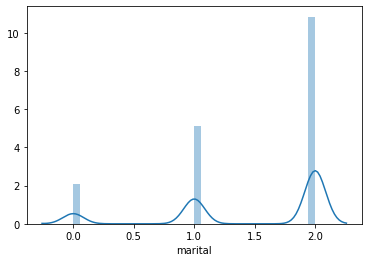

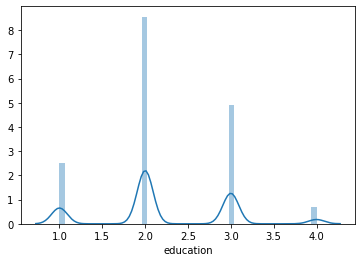

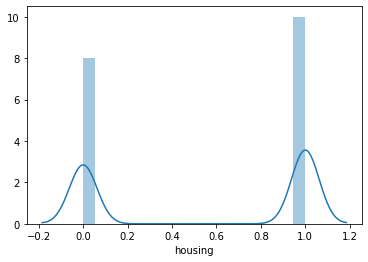

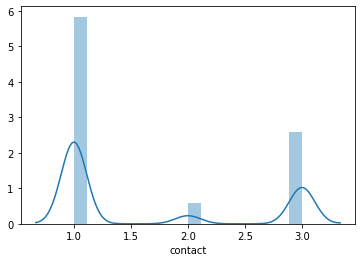

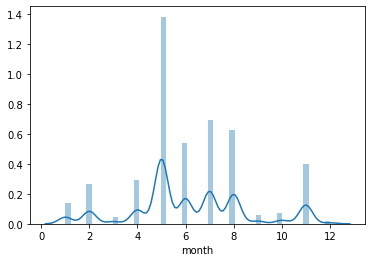

In [121]:
sns.distplot(newdata['marital'])
plt.show()

sns.distplot(newdata['education'])
plt.show()

sns.distplot(newdata['housing'])
plt.show()

sns.distplot(newdata['contact'])
plt.show()

sns.distplot(newdata['month'])
plt.show()


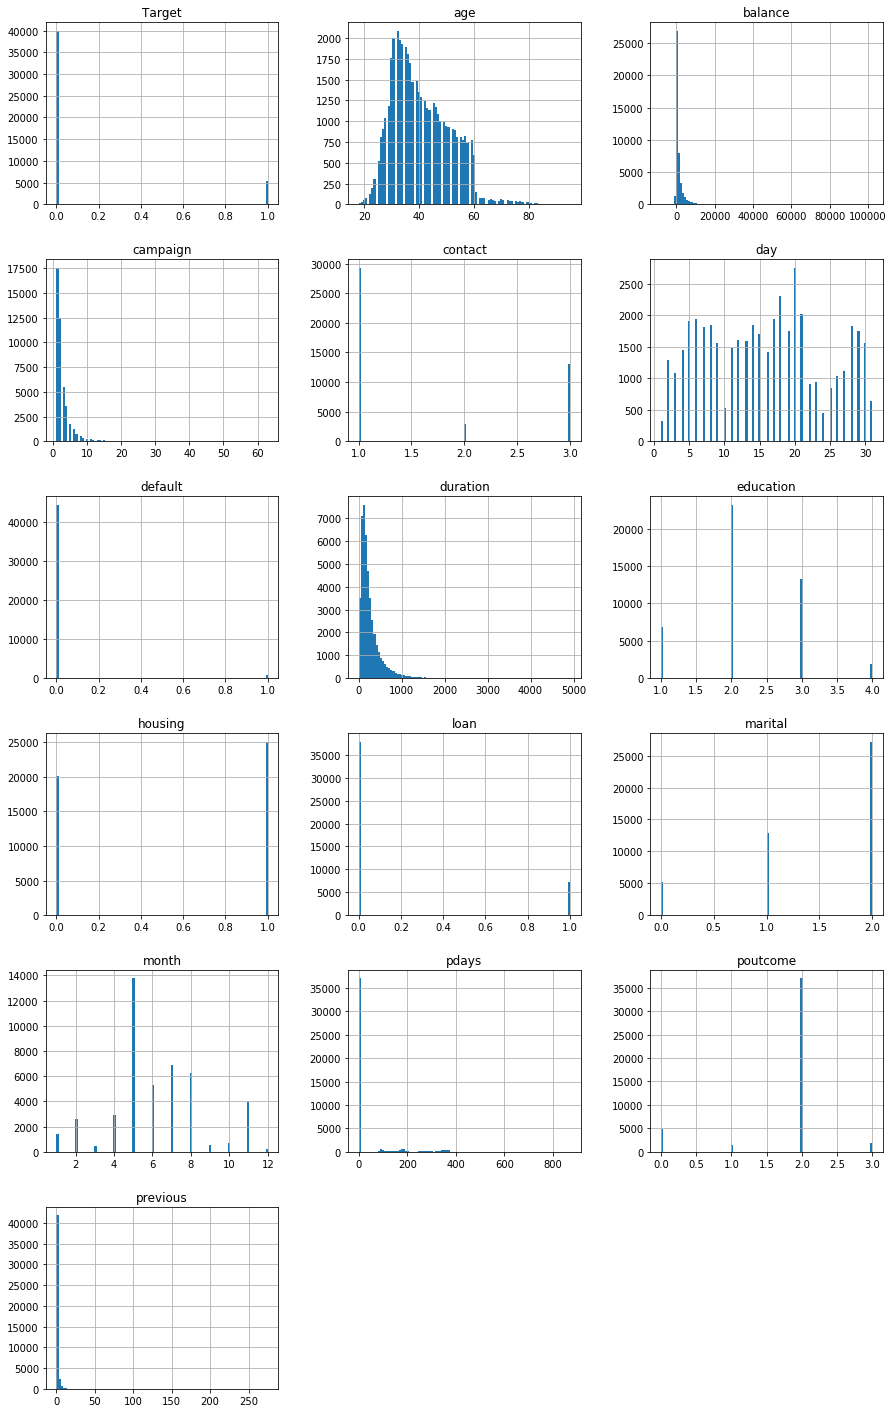

In [124]:
columns = list(newdata)
newdata[columns].hist(stacked=False, bins=100, figsize=(15,60), layout=(14,3)); 

#### DELIVERABLE 2 -- Prepare the data for analytics (10 MARKS)
* Ensure the attribute types are correct. If not, take appropriate actions.
* Get the data model ready. 
* Transform the data i.e. scale / normalize if required
* Create the training set and test set in ratio of 70:30

==> OBJECTIVE: build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. 

In [146]:
newdata2=newdata.drop('job',axis=1)

In [147]:
from sklearn.model_selection import train_test_split

X = newdata2.drop('Target',axis=1)    
Y = newdata2['Target']   # Predicted class 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
6149,32,2,2,1,-238,1,0,3,27,5,427,1,-1,0,2
12403,34,1,2,0,-478,1,1,3,27,6,111,4,-1,0,2
21645,32,2,2,0,266,1,0,1,19,8,168,2,-1,0,2
29580,36,2,2,1,13,0,1,1,3,2,150,4,-1,0,2
31245,23,1,2,0,486,0,0,1,3,3,87,1,-1,0,2


In [127]:
print("{0:0.1f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.1f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

70.0% data is in training set
30.0% data is in test set


#### DELIVERABLE 3 (30 MARKS)
* First create models using Logistic Regression and Decision Tree algorithm. Note the model performanceby using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10marks)
* 2.Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)


In [151]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

fitmodel1 = LogisticRegression(solver="liblinear")
fitmodel1.fit(x_train, y_train)
#predict on test data
y_predict = fitmodel1.predict(x_test)

coef_data = pd.DataFrame(fitmodel1.coef_)
coef_data['intercept'] = fitmodel1.intercept_
print(coef_data)


          0         1         2         3         4         5         6  \
0 -0.006906 -0.187206  0.029941 -0.091188  0.000026 -1.213156 -0.600223   

          7         8        9        10       11        12        13  \
0 -0.611971 -0.011232 -0.02738  0.004003 -0.14849  0.001119  0.084454   

         14  intercept  
0 -0.194251  -0.486015  


In [152]:
modelscore = fitmodel1.score(x_test, y_test)
print(modelscore)

0.8902241226776763


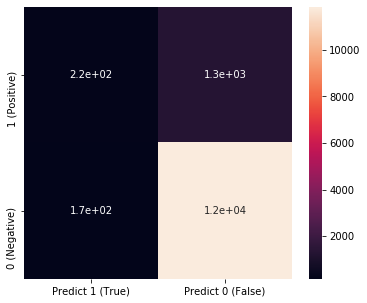

In [168]:
coff1=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

data_coff1 = pd.DataFrame(coff1, index = [i for i in ["1 (Positive)","0 (Negative)"]],
                  columns = [i for i in ["Predict 1 (True)","Predict 0 (False)"]])
plt.figure(figsize = (6,5))
sns.heatmap(data_coff1, annot=True)

### The confusion matrix analysis of Logistic Regression Method

* True Positives (TP): correctly predicted that they subscribe term deposit 330
* True Negatives (TN): we correctly predicted that they don't subscribe term deposit 12000
* False Positives (FP): we incorrectly predicted that they do subscribe term deposit (a "Type I error") 1200 
* False Negatives (FN): we incorrectly predicted that they don't subscribe term deposit (a "Type II error") 270 

In [174]:
print("Original Subscription to term deposit True Values  : {0} ({1:0.1f}%)".format(len(data.loc[newdata2['Target'] == 1]), (len(data.loc[newdata2['Target'] == 1])/len(data.index)) * 100))
print("Original Subscription to term deposit False Values : {0} ({1:0.1f}%)".format(len(data.loc[newdata2['Target'] == 0]), (len(data.loc[newdata2['Target'] == 0])/len(data.index)) * 100))
print("")
print("Training Subscription to term deposit True Values  : {0} ({1:0.1f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Subscription to term deposit False Values : {0} ({1:0.1f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Subscription to term deposit True Values      : {0} ({1:0.1f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Subscription to term deposit False Values     : {0} ({1:0.1f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Subscription to term deposit True Values  : 5289 (11.7%)
Original Subscription to term deposit False Values : 39922 (88.3%)

Training Subscription to term deposit True Values  : 3738 (11.8%)
Training Subscription to term deposit False Values : 27909 (88.2%)

Test Subscription to term deposit True Values      : 1551 (11.4%)
Test Subscription to term deposit False Values     : 12013 (88.6%)



##### ==> According to the confusion matrix and the percentages above, Training and Test model values are quite closely modelled to the Original values. Leading to its ability to predict more accurately in the test data.

## Build decision tree

In [175]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [161]:
print(dtree.score(x_train, y_train))
print(dtree.score(x_test, y_test))

1.0
0.8757741079327632


In [162]:
trainlabel = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dtree, out_file=Credit_Tree_File, feature_names = list(x_train), class_names = list(trainlabel))
Credit_Tree_File.close()

In [163]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

system command returning error: 32512


In [165]:
dtree_reduced = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1) #reduce overfitting
dtree_reduced.fit(x_train, y_train)
print(dtree_reduced.score(x_train, y_train))
print(dtree_reduced.score(x_test, y_test))

0.8889626188896262
0.8898554998525509


In [176]:
print (pd.DataFrame(dtree_reduced.feature_importances_, columns = ["Importance"], index = x_train.columns))

           Importance
age          0.057332
marital      0.000000
education    0.000000
default      0.000000
balance      0.000000
housing      0.126562
loan         0.000000
contact      0.039346
day          0.000000
month        0.000000
duration     0.668007
campaign     0.000000
pdays        0.108754
previous     0.000000
poutcome     0.000000


0.8898554998525509


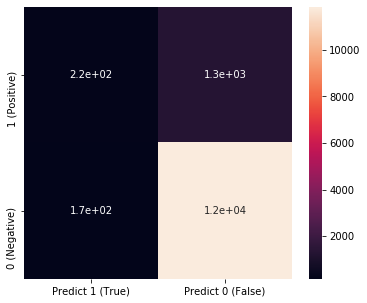

In [170]:
print(dtree_reduced.score(x_test , y_test))
y_predict = dtree_reduced.predict(x_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0 = Negative","1 = Positive"]],
                  columns = [i for i in ["(Predict 0) : False","(Predict 1) : True"]])
plt.figure(figsize = (6,5))
sns.heatmap(data_coff1, annot=True)

### The confusion matrix analysis of Decision Tree Method

* True Positives (TP): correctly predicted that they subscribe term deposit 220
* True Negatives (TN): we correctly predicted that they don't subscribe term deposit 12000
* False Positives (FP): we incorrectly predicted that they do subscribe term deposit (a "Type I error") 170 
* False Negatives (FN): we incorrectly predicted that they don't subscribe term deposit (a "Type II error") 1300 